In [1]:
# 시계열 데이터

# 2번째 앞에 반드시 1번째, 순서가 있어야 함

# 대표적으로 언어.
# 나 내일 간다 학교, 한글은 되는데, 안되는 언어도 있음.
# 시간도 있음.

# 기존의 데이터는 순서가 없음. -> 문제 생김 (=전통적인 neural network는 지속적인 생각을 못함)
# 그래서 생긴게 RNN

In [2]:
# 시퀀스 배열로 다루는 순환 신경망(RNN)
# 앞에서 입력된 데이터를 잠시 기억함
# 그리고 기억된 데이터가 얼마나 중요한지를 판단하여 
# 별도의 가중치를 줘서 다음 데이터로 넘어감
# 

# 같은층을 맴도는 것처럼 보임
# 그래서 RNN이라고 이름 붙임

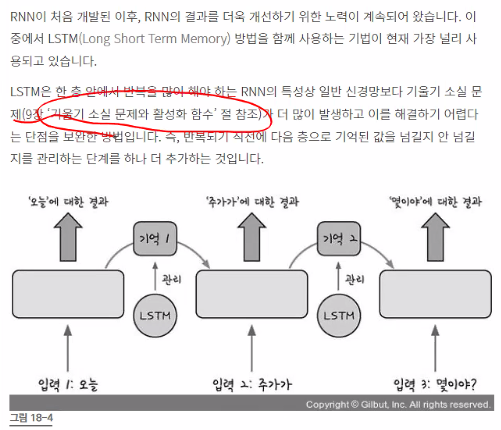

- 단점
- back~~~ 은 뒤에서 부터 계산. 기울기는 1보다 작음. 앞으로 오다보면 기울기가 0이 되는 문제가 발생 -> 계산 불가
- 다 기억하다보니, 쓸대없는 말까지 계속 기억하고 가야하는 경우 생김. 메모리 낭비

In [4]:
# https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr

# RNN은 음성 인식, 언어 모델링, 번역, 이미지 주석 생성 등등등등의 다양한 분야에서 
# 굉장한 성공을 거두었다.

In [5]:
# 그래서 나온게 LSTM
# 이게 좋다보니까 LSTM 파생된게 나옴

In [6]:
# https://thebook.io/080228/part05/ch18/01/

# 로이터 뉴스 데이터는, 총 11,258개의 뉴스 기사가 
# 46개의 카테고리로 나누어진 대용량 텍스트 데이터

# 다중분류인데, 클래스가 46개라는 뜻

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters  # keras에서 얘의 dataset을 제공함
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import utils

In [2]:
# 로이터 뉴스 데이터셋 불러오기
# from keras.datasets import reuters

# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)  # -> 인덱스가 0~999까지 들어올것. 그래서 아래 model.add(Embedding(1000,100))이 1000개일것
# 1000 -> 단어 index를 가져와서 뭔가를 해야하는데, 빈도수가 1000번 이상만 나온 단어만 쓰겠다는 소리.
# 그 밑으로 나온 것들은 버리겠다는 소리  -> 자주 나온 단어들 측정 위해.

# 정정 -> 1000번이 아니라,  ->  1000번째
#  ->  ???
#   -> 더 모르겠는데??????


#  ->  정정2

#  빈도가 1~1000번인 단어만 쓰겠다는 소리
# -> 빈도가 너무 많은 단어는 쓰지 않겠다는 소리.

In [3]:
# 데이터 확인 후 출력
# 데이터 확인하기
category = np.max(Y_train) + 1
print(category, '카테고리')    # 총 46 카테고리
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
# 인덱스를 이미 바꿔놓은 것이니,
# 얘를 이제 페딩처리 하면 됨

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

#  얘를 이제 원-핫 인코딩으로 바꿈
y_train = utils.to_categorical(Y_train)
y_test = utils.to_categorical(Y_test)

# 입력값은 둘다 100자리로 패딩처리,
# 출력값은 원-핫인코딩 함.

In [5]:
# 모델의 설정
model = Sequential()  # 모델은 시퀀스로 객체를 만들고
model.add(Embedding(1000, 100))   # 여기다 임베딩 객체를 넣음. 1000개
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [ ]:
# 여기서 numpy에서 에러 발생
# tf 버전이 2.3.0이면, 여기서 numpy랑 충돌나는 듯 함.

# 나는 여기서 conda update -n base conda 로 업데이트해서 tf 버전이 2.6으로 올라감.
# 내꺼는 2.6.0이라 에러 안나는듯 하다.

# 여기서 넘파이 버전때문에 뭔가를 강제로 지우면 다 뭉게짐...

In [7]:
tf.__version__

'2.6.0'

In [8]:
import sys
print(sys.version)   # 파이썬 버전 확인

3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]


In [9]:
conda --version

conda 4.10.3

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 아래는 참고. 궁금하면 볼것. 난 안궁금함

In [ ]:
# https://stackoverflow.com/questions/38080035/how-to-calculate-the-number-of-parameters-of-an-lstm-network

# How to calculate the number of parameters of an LSTM network?

# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation
# from keras.layers import Embedding
# from keras.layers import LSTM
# model = Sequential()
# model.add(LSTM(256, input_dim=4096, input_length=16))
# model.summary()


# Output

# Layer (type)                       Output Shape        Param #     Connected to                     
# ====================================================================================================
# lstm_1 (LSTM)                      (None, 256)         4457472     lstm_input_1[0][0]               
# ====================================================================================================
# Total params: 4457472

In [10]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 다중분류니까 categorical_crossentropy


In [11]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, 
                    validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 12s 110ms/step - loss: 2.5951 - accuracy: 0.3458 - val_loss: 2.3977 - val_accuracy: 0.3620
Epoch 2/20
90/90 [==============================] - 10s 109ms/step - loss: 2.1423 - accuracy: 0.4665 - val_loss: 2.0181 - val_accuracy: 0.5116
Epoch 3/20
90/90 [==============================] - 10s 111ms/step - loss: 1.9937 - accuracy: 0.5071 - val_loss: 1.8818 - val_accuracy: 0.5160
Epoch 4/20
90/90 [==============================] - 9s 99ms/step - loss: 1.8317 - accuracy: 0.5314 - val_loss: 1.7944 - val_accuracy: 0.5445
Epoch 5/20
90/90 [==============================] - 9s 97ms/step - loss: 1.7052 - accuracy: 0.5569 - val_loss: 1.6997 - val_accuracy: 0.5641
Epoch 6/20
90/90 [==============================] - 9s 96ms/step - loss: 1.6033 - accuracy: 0.5915 - val_loss: 1.6992 - val_accuracy: 0.5628
Epoch 7/20
90/90 [==============================] - 9s 96ms/step - loss: 1.5232 - accuracy: 0.6151 - val_loss: 1.5593 - val_accuracy: 0.6184
Epoch 8

In [12]:
# 테스트 정확도 출력
print("Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 18ms/step - loss: 1.2409 - accuracy: 0.7039
Test Accuracy: 0.7039


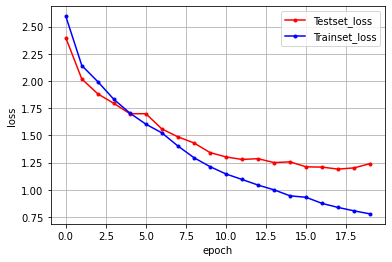

In [13]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
# 46개의 카테고리를 맞추는데, 72개면 맞추는 듯   <--  ?

In [ ]:
# 테스트셋에 대한 정확도가 71.28%를 보이고 있습니다. 
# 테스트 오차가 상승하기 전까지의 학습이 과적합 직전의 최적 학습 시간입니다.